# Лабораторная работа по заданию №  2. Алгоритмы безусловной нелинейной оптимизации. Прямые методы

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import minimize, brute, fmin

## I. 

### Математические функции

In [2]:
# x^3
def first(x):
    return x**3

# |𝑥 − 0,2|
def second(x):
    return abs(x-0.2)

#𝑥 𝑠𝑖𝑛 1/𝑥
def third(x):
    return x*math.sin(1/x)  


### Методы поиска 𝑥: 𝑓(𝑥) → 𝑚𝑖𝑛 

In [3]:
def iteration(a, b, eps, func):
    args = np.arange(a,b,eps)
    iterations=0
    x=args[0]
    value=func(x)
    func_iter=1
    i = 1
    while i < np.size(args):
        if(func(args[i-1])<value):
            x = args[i-1] 
            value = func(args[i-1])            
        i=i+1
        iterations+=1
        func_iter+=1
    return x, func(x), iterations, func_iter

def dyhotomy(a,b, eps, func):
    mid = (a+b)/2
    iterations=0
    func_iter=0
    while abs(func(b)-func(a)) > eps:
        func_iter+=2
        if func(a)>func(mid):
            a=mid
            mid=(a+b)/2
        elif func(b)>func(mid):
            b=mid
            mid=(a+b)/2
        iterations+=1
    if func(a)>func(mid):
        a=mid
        mid=(a+b)/2
    elif func(b)>func(mid):
        b=mid
        mid=(a+b)/2
    iterations+=1
    func_iter+=1
    return mid, func(mid), iterations, func_iter

def goldenSectionSearch(a, b, eps, func):
    phi = (1 + pow(5, 1/2)) / 2
    resphi = 2 - phi
    x1 = a + resphi * (b - a)
    x2 = b - resphi * (b - a)
    f1 = func(x1)
    f2 = func(x2)
    iterations=0
    func_iter=2
    while abs(b - a) > eps:
        if f1 < f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + resphi * (b - a)
            f1 = func(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = b - resphi * (b - a)
            f2 = func(x2)
        iterations+=1
        func_iter+=1
    if f1 < f2:
        b = x2
        x2 = x1
        f2 = f1
        x1 = a + resphi * (b - a)
        f1 = func(x1)
    else:
        a = x1
        x1 = x2
        f1 = f2
        x2 = b - resphi * (b - a)
        f2 = func(x2)
    x=(x1 + x2) / 2
    iterations+=1
    func_iter+=1
    return x, func(x), iterations, func_iter

### Вывод результатов

In [4]:
print('Метод итераций:')
r=iteration(0, 1.001, 0.001, first)
print('x='+str(r[0])+', f(x)='+str(r[1])+', Количество итераций: '+str(r[2])+', Количество вычислений функции: '+str(r[3]))
r=iteration(0, 1.001, 0.001, second)
print('x='+str(r[0])+', f(x)='+str(r[1])+', Количество итераций: '+str(r[2])+', Количество вычислений функции: '+str(r[3]))
r=iteration(0.01, 1.001, 0.001, third)
print('x='+str(r[0])+', f(x)='+str(r[1])+', Количество итераций: '+str(r[2])+', Количество вычислений функции: '+str(r[3]))
print('\nМетод дихотомии:')
r=dyhotomy(0, 1, 0.001, first)
print('x='+str(r[0])+', f(x)='+str(r[1])+', Количество итераций: '+str(r[2])+', Количество вычислений функции: '+str(r[3]))
r=dyhotomy(0, 1, 0.001, second)
print('x='+str(r[0])+', f(x)='+str(r[1])+', Количество итераций: '+str(r[2])+', Количество вычислений функции: '+str(r[3]))
r=dyhotomy(0.01, 1, 0.001, third)
print('x='+str(r[0])+', f(x)='+str(r[1])+', Количество итераций: '+str(r[2])+', Количество вычислений функции: '+str(r[3]))
print('\nМетод золотого сечения:')
r=goldenSectionSearch(0, 1, 0.001, first)
print('x='+str(r[0])+', f(x)='+str(r[1])+', Количество итераций: '+str(r[2])+', Количество вычислений функции: '+str(r[3]))
r=goldenSectionSearch(0, 1, 0.001, second)
print('x='+str(r[0])+', f(x)='+str(r[1])+', Количество итераций: '+str(r[2])+', Количество вычислений функции: '+str(r[3]))
r=goldenSectionSearch(0.01, 1, 0.001, third)
print('x='+str(r[0])+', f(x)='+str(r[1])+', Количество итераций: '+str(r[2])+', Количество вычислений функции: '+str(r[3]))

Метод итераций:
x=0.0, f(x)=0.0, Количество итераций: 1000, Количество вычислений функции: 1001
x=0.2, f(x)=0.0, Количество итераций: 1000, Количество вычислений функции: 1001
x=0.22299999999999984, f(x)=-0.21722461258083448, Количество итераций: 990, Количество вычислений функции: 991

Метод дихотомии:
x=0.015625, f(x)=3.814697265625e-06, Количество итераций: 5, Количество вычислений функции: 9
x=0.250244140625, f(x)=0.05024414062499999, Количество итераций: 11, Количество вычислений функции: 21
x=0.25756042480468755, f(x)=-0.17385836147520317, Количество итераций: 13, Количество вычислений функции: 25

Метод золотого сечения:
x=0.00022655192689241074, f(x)=1.1627953356593818e-11, Количество итераций: 16, Количество вычислений функции: 18
x=0.1999332969525494, f(x)=6.67030474506003e-05, Количество итераций: 16, Количество вычислений функции: 18
x=0.22258097699647733, f(x)=-0.21723358052922428, Количество итераций: 16, Количество вычислений функции: 18


## II. 

### Объявление базовых функций, создание исходного массива

In [29]:
a=np.random.random()
b=np.random.random()
x_array=[]
y_array=[]

def lin_approx(x, a, b):
    return a*x+b
def rat_approx(x, a, b):
    return a/(1+b*x)
def main_func(x):
    sigma=np.random.normal()
    y=a*x+b+sigma
    return y

def sq_function_lin(params):
    a, b=params
    summ=0
    for i in range (100):
        summ=summ+(lin_approx(x_array[i], a, b)-y_array[i])**2
    return summ

def sq_function_rat(params):
    a, b=params
    summ=0
    for i in range (100):
        summ=summ+(rat_approx(x_array[i], a, b)-y_array[i])**2
    return summ

for i in range (100):    
    x=i/100
    y=main_func(x)
    
    x_array.append(x)
    y_array.append(y)

### Аппроксимация рациональной функцией 


Исходные параметры:
a=0.5535665325182213, b=0.4236215241449921
Optimization terminated successfully.
         Current function value: 98.886560
         Iterations: 106
         Function evaluations: 212

Метод Нелдера-Мида:
a=0.36528142387352824, b=-0.739064078863183

Метод перебора:
a=0.3652565690013026, b=-0.7390798745268512
Optimization terminated successfully.
         Current function value: 98.886560
         Iterations: 5
         Function evaluations: 188

Метод Пауэлла:
a=0.36527857090782, b=-0.7390697962523035


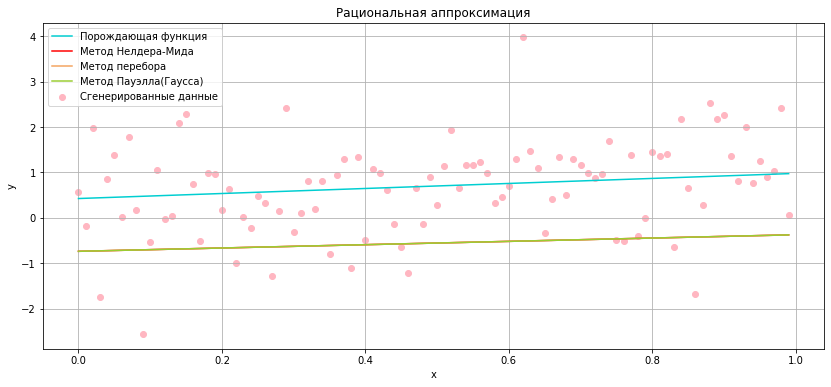

In [30]:
#Рациональная аппроксимация с минимизацией методом Нелдера-Мида 
print('\nИсходные параметры:\na='+str(a)+', b='+str(b))

params=[0.5, 0.5]
res = minimize(sq_function_rat, params,  method='nelder-mead',
    options={'xtol': 1e-8, 'disp': True})
nm_rat=res.x
nm_rat_approx_array=[nm_rat[0]*x+nm_rat[1] for x in x_array]
print('\nМетод Нелдера-Мида:\na='+str(nm_rat[0])+', b='+str(nm_rat[1]))

#Рациональная аппроксимация с минимизацией методом перебора 
rranges = (slice(0, 1, 0.01), slice(0, 1, 0.01))
bf_rat=brute(sq_function_rat, rranges, finish=fmin)
bf_rat_approx_array=[bf_rat[0]*x+bf_rat[1] for x in x_array]
print('\nМетод перебора:\na='+str(bf_rat[0])+', b='+str(bf_rat[1]))

#Рациональная аппроксимация с минимизацией методом Пауэлла (вместо Гаусса) 
res = minimize(sq_function_rat, params,  method='powell',
    options={'xtol': 1e-8, 'disp': True})
pow_rat=res.x
pow_rat_approx_array=[pow_rat[0]*x+pow_rat[1] for x in x_array]
print('\nМетод Пауэлла:\na='+str(pow_rat[0])+', b='+str(pow_rat[1]))

plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
ax.plot(x_array, [el*a+b for el in x_array], color='DarkTurquoise', label='Порождающая функция')
ax.plot(x_array, nm_rat_approx_array, color='red', label='Метод Нелдера-Мида')
ax.plot(x_array, bf_rat_approx_array, color='SandyBrown', label='Метод перебора')
ax.plot(x_array, pow_rat_approx_array, color='#9ACD32', label='Метод Пауэлла(Гаусса)')
ax.scatter(x_array, y_array, color='#FFB6C1', label='Сгенерированные данные')
ax.set(xlabel='x', ylabel='y',title='Рациональная аппроксимация')
leg = plt.legend()
ax.grid()
plt.show()

### Аппроксимация линейной функцией 


Исходные параметры:
a=0.5535665325182213, b=0.4236215241449921
Optimization terminated successfully.
         Current function value: 98.752942
         Iterations: 68
         Function evaluations: 133

Метод Нелдера-Мида:
a=0.9771876221670368, b=0.1675083997767762

Метод перебора:
a=0.9772066729631625, b=0.16750416781930838
Optimization terminated successfully.
         Current function value: 98.752942
         Iterations: 3
         Function evaluations: 112

Метод Пауэлла:
a=0.9771876358338504, b=0.16750838562958556


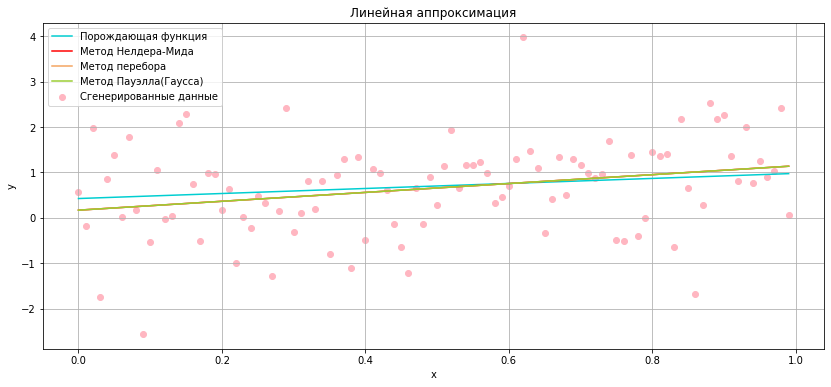

In [31]:
#Линейная аппроксимация с минимизацией методом Нелдера-Мида    
print('\nИсходные параметры:\na='+str(a)+', b='+str(b))

params=[0.5, 0.5]
res = minimize(sq_function_lin, params,  method='nelder-mead',
    options={'xtol': 1e-8, 'disp': True})
nm_lin=res.x
nm_lin_approx_array=[nm_lin[0]*x+nm_lin[1] for x in x_array]
print('\nМетод Нелдера-Мида:\na='+str(nm_lin[0])+', b='+str(nm_lin[1]))

#Линейная аппроксимация с минимизацией методом перебора 
rranges = (slice(0, 1, 0.01), slice(0, 1, 0.01))
bf_lin=brute(sq_function_lin, rranges, finish=fmin)
bf_lin_approx_array=[bf_lin[0]*x+bf_lin[1] for x in x_array]
print('\nМетод перебора:\na='+str(bf_lin[0])+', b='+str(bf_lin[1]))

#Линейная аппроксимация с минимизацией методом Пауэлла (вместо Гаусса) 
res = minimize(sq_function_lin, params,  method='powell',
    options={'xtol': 1e-8, 'disp': True})
pow_lin=res.x
pow_lin_approx_array=[pow_lin[0]*x+pow_lin[1] for x in x_array]
print('\nМетод Пауэлла:\na='+str(pow_lin[0])+', b='+str(pow_lin[1]))

plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
ax.plot(x_array, [el*a+b for el in x_array], color='DarkTurquoise', label='Порождающая функция')
ax.plot(x_array, nm_lin_approx_array, color='red', label='Метод Нелдера-Мида')
ax.plot(x_array, bf_lin_approx_array, color='SandyBrown', label='Метод перебора')
ax.plot(x_array, pow_lin_approx_array, color='#9ACD32', label='Метод Пауэлла(Гаусса)')
ax.scatter(x_array, y_array, color='#FFB6C1', label='Сгенерированные данные')
ax.set(xlabel='x', ylabel='y',title='Линейная аппроксимация')
leg = plt.legend()
ax.grid()
plt.show()